#Money change again

In [1]:
%%writefile change_dp.cpp
#include <bits/stdc++.h>

using namespace std;

int get_change(int m){
    vector<int> dp (m+1, 0);
    vector<int> denom {1, 3, 4};
    for(int i = 1; i <= m; i++){
        int u = 1e9;
        for(size_t j = 0; j < 3; j++){
            if(i < denom[j])
                continue;
            u = min(u, dp[i-denom[j]]+1);
        }
        dp[i] = u;
    }
    return dp[m];
}
    

int main()
{
    int m;
    cin >> m;
    cout << get_change(m) <<"\n";
    return 0;
}

Writing change_dp.cpp


In [ ]:
!g++ change_dp.cpp -o change 
!./change

34
9


#primitive calculator

In [2]:
%%writefile primitive_calculator.cpp
#include <bits/stdc++.h>

using namespace std;

void optimal_sequence(int n){
    vector<int> dp (n+1, 0);
    vector<int> previous (n+1);

    for(int i = 2; i <= n; i++){
        dp[i] = 1e9;
        for(int j = 1; j <= 3; j++){
            if(j == 1){
                int u = dp[i-1]+1;
                if(u < dp[i]){
                    dp[i] = u;
                    previous[i] = i-1;
                }
            }
            else{
                if(i % j)
                    continue;
                int u = dp[i / j]+1;
                if(u < dp[i]){
                    dp[i] = u;
                    previous[i] = i / j;
                }
            }
        }
    }
    cout << dp[n] << "\n";
    list<int> ans;
    for(int i = n; i > 0; i = previous[i]){
        ans.push_front(i);
    }
    for(auto a : ans)
        cout << a << " ";
}

int main(){
    int n;
    cin >> n;
    optimal_sequence(n);
    return 0;
}

Writing primitive_calculator.cpp


In [ ]:
!g++ primitive_calculator.cpp -o primitive
!./primitive

96234
14
1 3 9 10 11 33 99 297 891 2673 8019 16038 16039 48117 96234 

#edit distance

In [3]:
%%writefile edit_distance.cpp
#include <bits/stdc++.h>

using namespace std;

int edit_distance(string a, string b){
    int dp[a.length()+1][b.length()+1];
    for(size_t i = 0; i <= a.length(); i++){
        for(size_t j = 0; j <= b.length(); j++){
            if(i == 0)
                dp[i][j] = j;
            else if(j == 0)
                dp[i][j] = i;
            else if(a[i-1] == b[j-1])
                dp[i][j] = dp[i-1][j-1];
            else
                dp[i][j] = min(min(dp[i][j-1], dp[i-1][j]), dp[i-1][j-1]) + 1;
        }
    }
    return dp[a.length()][b.length()];
}
int main(){
    string str1;
    string str2;
    cin >> str1 >> str2;
    cout << edit_distance(str1, str2);
    return 0;
}

Writing edit_distance.cpp


In [ ]:
!g++ edit_distance.cpp -o edit_distance
!./edit_distance

editing
distance
5

#Evidencia
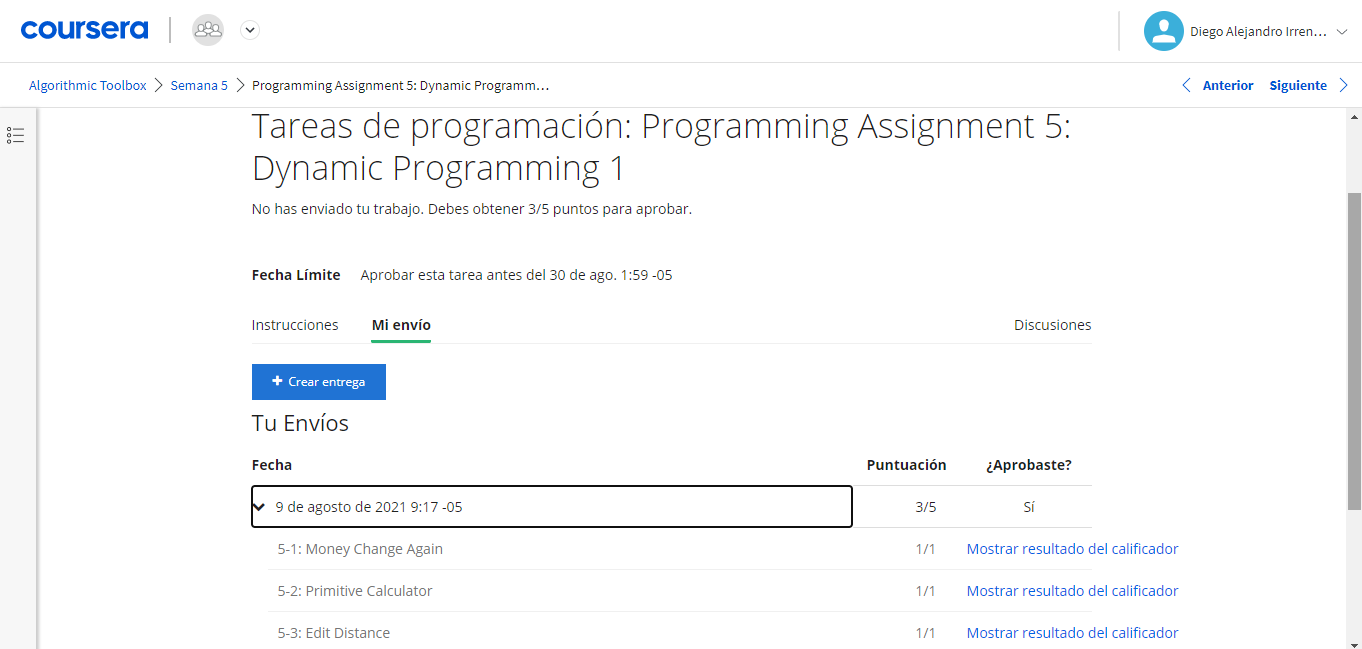